## Credit risk

#### The aim of the project is to create a PD model.

## Import libraries

In [310]:
import pandas as pd
import scorecardpy as sc
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable

## Data loading and preprocessing

In [265]:
df = pd.read_csv("credit_risk_dataset.csv")

In [266]:
pd.set_option('display.max_columns', None)
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [268]:
df.shape

(32581, 12)

In [269]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [270]:
df = df[(df["person_age"] <= 90) & (df["person_emp_length"] <= 50)]


In [271]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31678.000000,3.167800e+04,31678.000000,31678.000000,28632.000000,31678.000000,31678.000000,31678.000000
mean,27.728581,6.649144e+04,4.782183,9660.062188,11.039701,0.215449,0.169607,5.808542
std,6.202358,5.276909e+04,4.034956,6334.435654,3.229409,0.411140,0.106269,4.058028
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [272]:
df.shape

(31678, 12)

In [273]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

loan_int_rate    3046
dtype: int64

In [274]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)


In [275]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31678.000000,3.167800e+04,31678.000000,31678.000000,31678.000000,31678.000000,31678.000000,31678.000000
mean,27.728581,6.649144e+04,4.782183,9660.062188,11.034922,0.215449,0.169607,5.808542
std,6.202358,5.276909e+04,4.034956,6334.435654,3.070254,0.411140,0.106269,4.058028
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31678 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31678 non-null  int64  
 1   person_income               31678 non-null  int64  
 2   person_home_ownership       31678 non-null  object 
 3   person_emp_length           31678 non-null  float64
 4   loan_intent                 31678 non-null  object 
 5   loan_grade                  31678 non-null  object 
 6   loan_amnt                   31678 non-null  int64  
 7   loan_int_rate               31678 non-null  float64
 8   loan_status                 31678 non-null  int64  
 9   loan_percent_income         31678 non-null  float64
 10  cb_person_default_on_file   31678 non-null  object 
 11  cb_person_cred_hist_length  31678 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [278]:
duplicate_count = df.duplicated().sum()
duplicate_count


157

In [279]:
df.drop_duplicates(inplace=True)


In [280]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

In [281]:
df["loan_status"].value_counts(normalize=True)


loan_status
0    0.784049
1    0.215951
Name: proportion, dtype: float64

## Preparation of independent variables

In [282]:
df_info_value = sc.iv(df, y='loan_status')

In [284]:
df_info_value

,variable,info_value
1,person_income,1.493097
0,loan_percent_income,0.979086
6,loan_grade,0.908629
3,loan_int_rate,0.896221
10,person_home_ownership,0.373746
7,loan_amnt,0.252309
5,cb_person_default_on_file,0.168967
2,loan_intent,0.096911
8,person_emp_length,0.067838
9,person_age,0.023185


In [285]:
df_s = sc.var_filter(df, y='loan_status')

[INFO] filtering variables ...


In [286]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31521 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_percent_income        31521 non-null  float64
 1   person_income              31521 non-null  int64  
 2   loan_intent                31521 non-null  object 
 3   loan_int_rate              31521 non-null  float64
 4   cb_person_default_on_file  31521 non-null  object 
 5   loan_grade                 31521 non-null  object 
 6   loan_amnt                  31521 non-null  int64  
 7   person_emp_length          31521 non-null  float64
 8   person_age                 31521 non-null  int64  
 9   person_home_ownership      31521 non-null  object 
 10  loan_status                31521 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 2.8+ MB


In [287]:
bins = sc.woebin(df_s, y='loan_status')


[INFO] creating woe binning ...


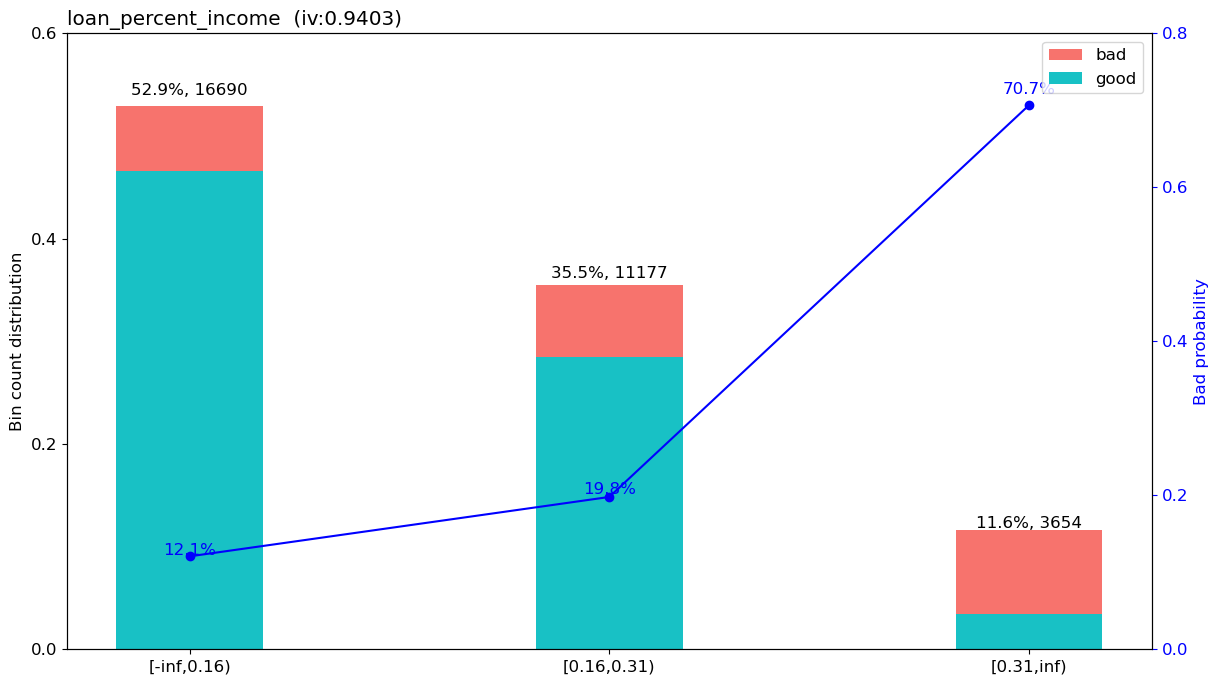

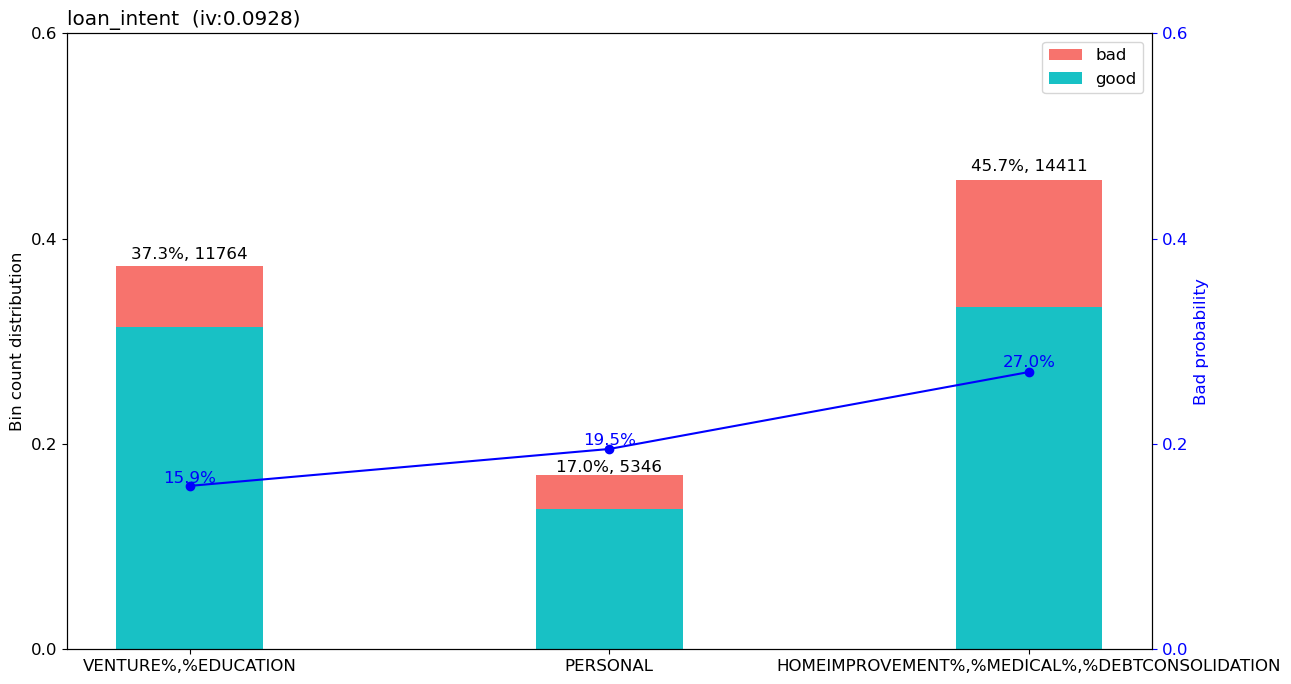

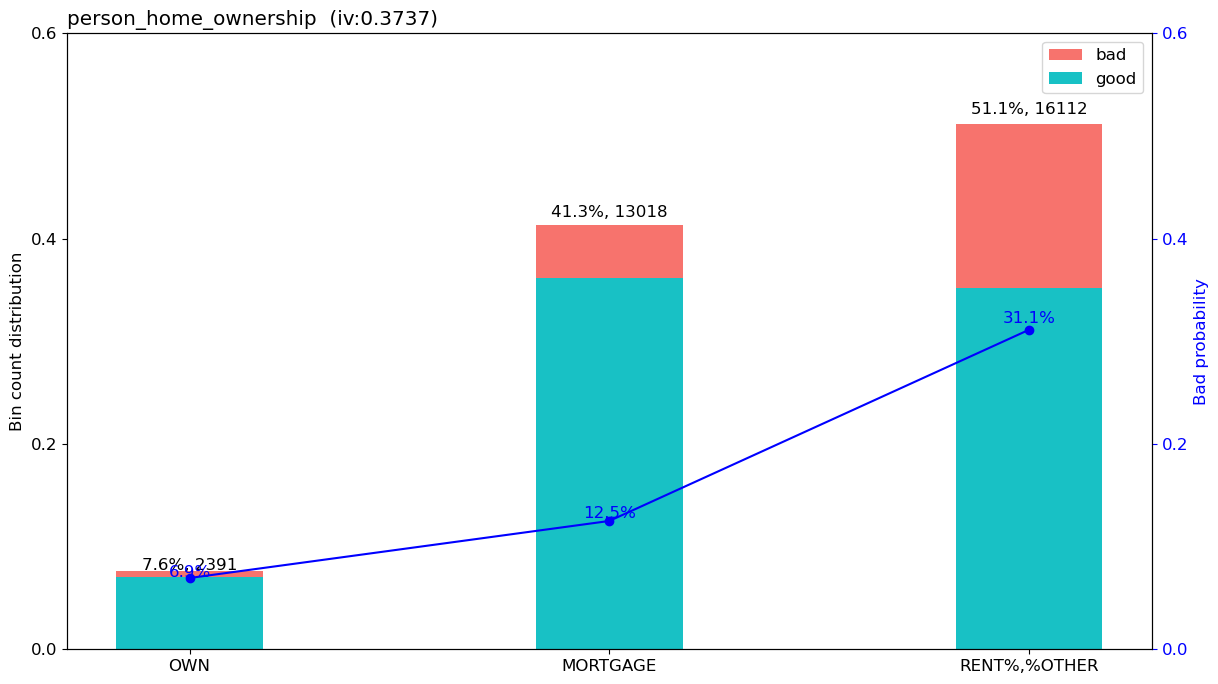

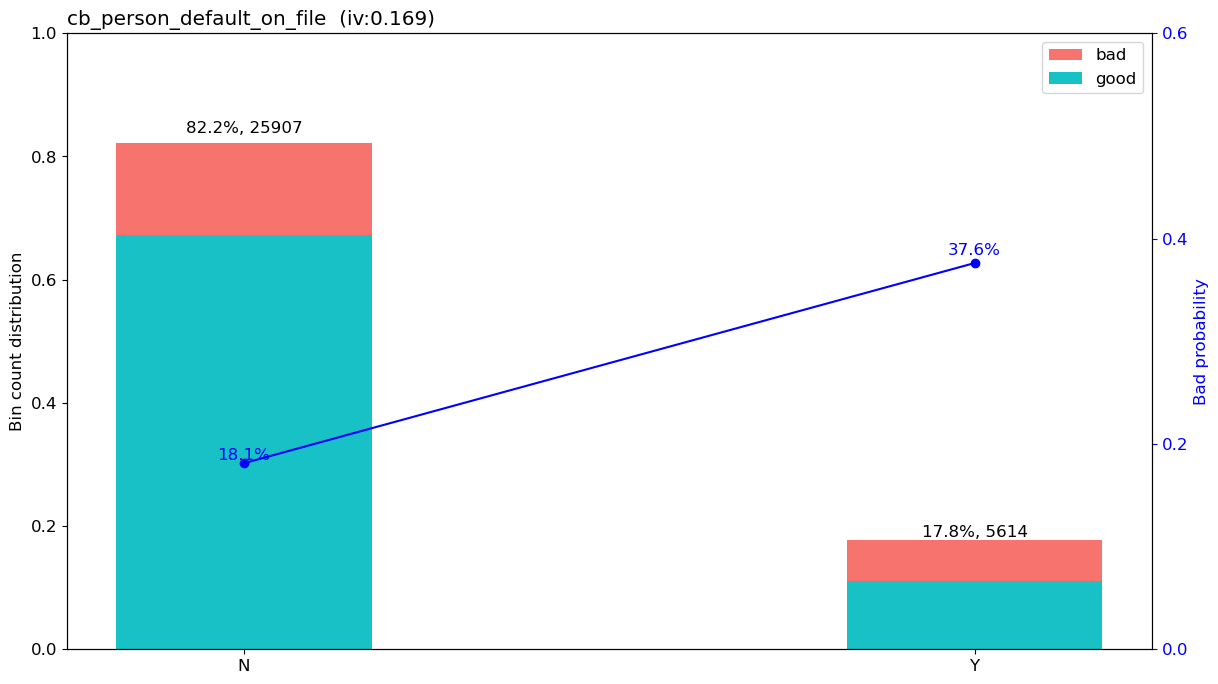

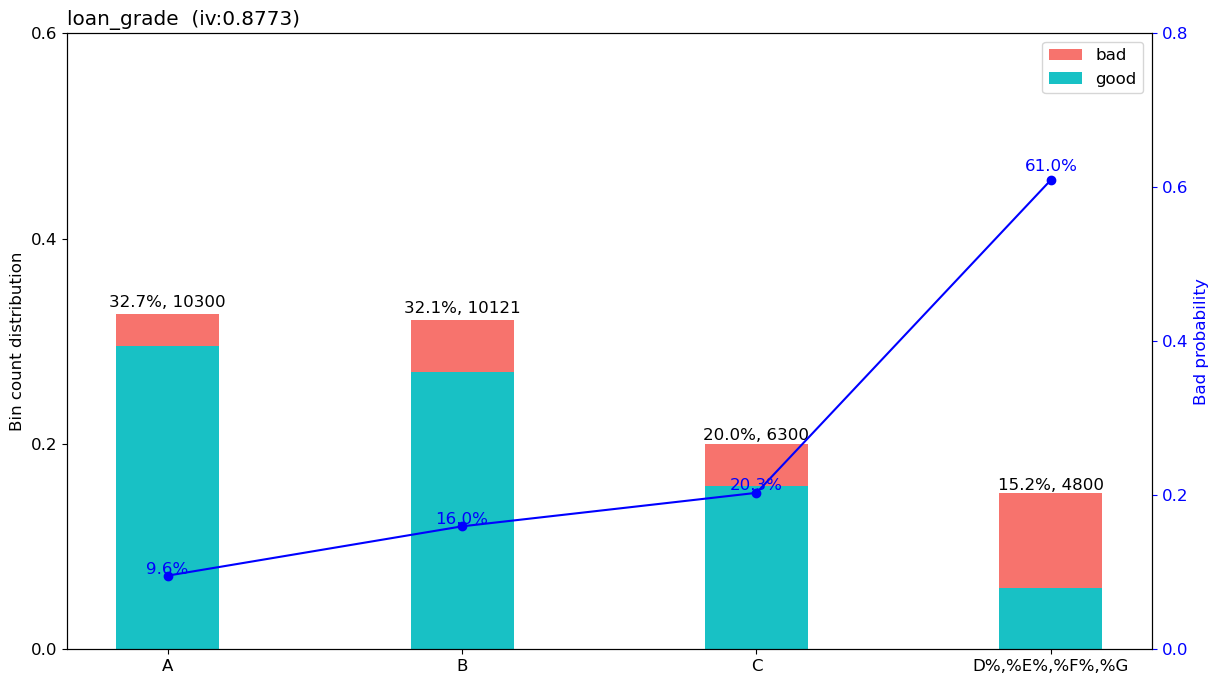

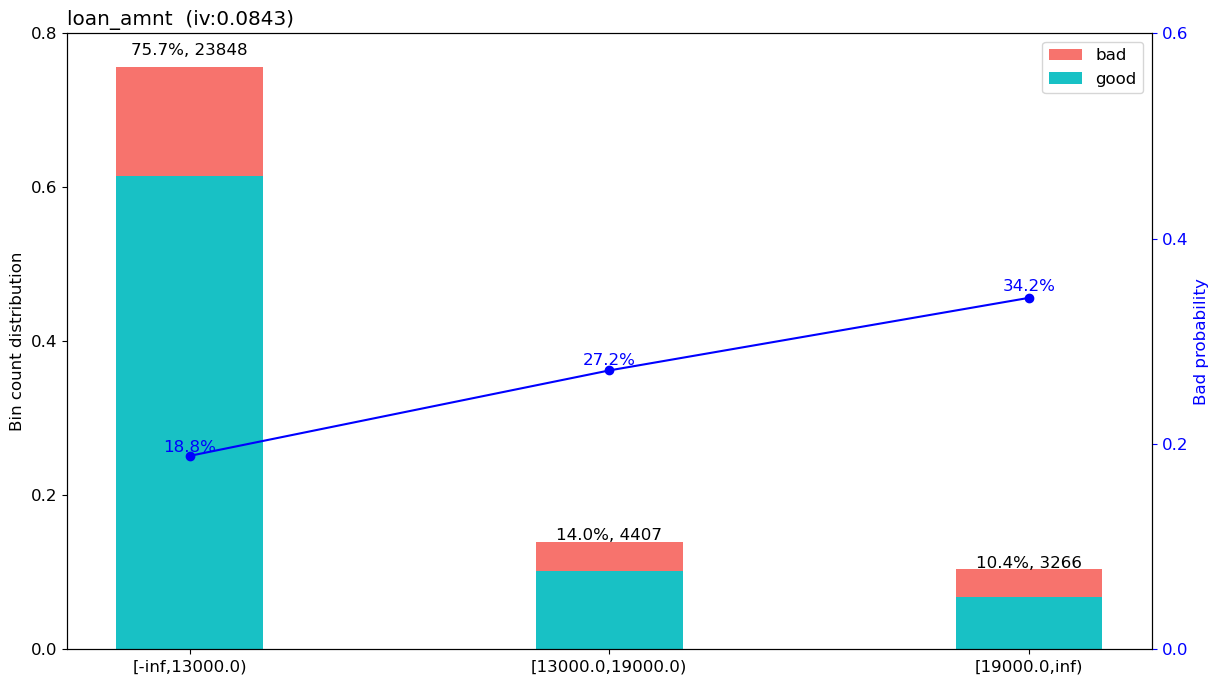

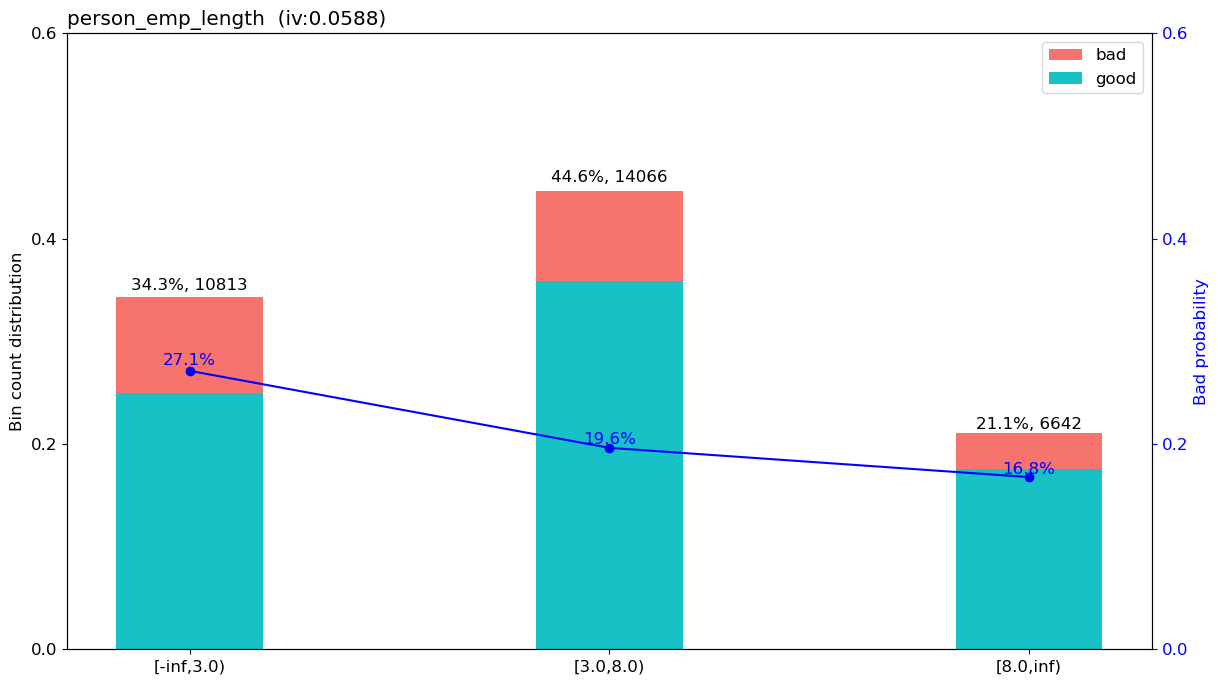

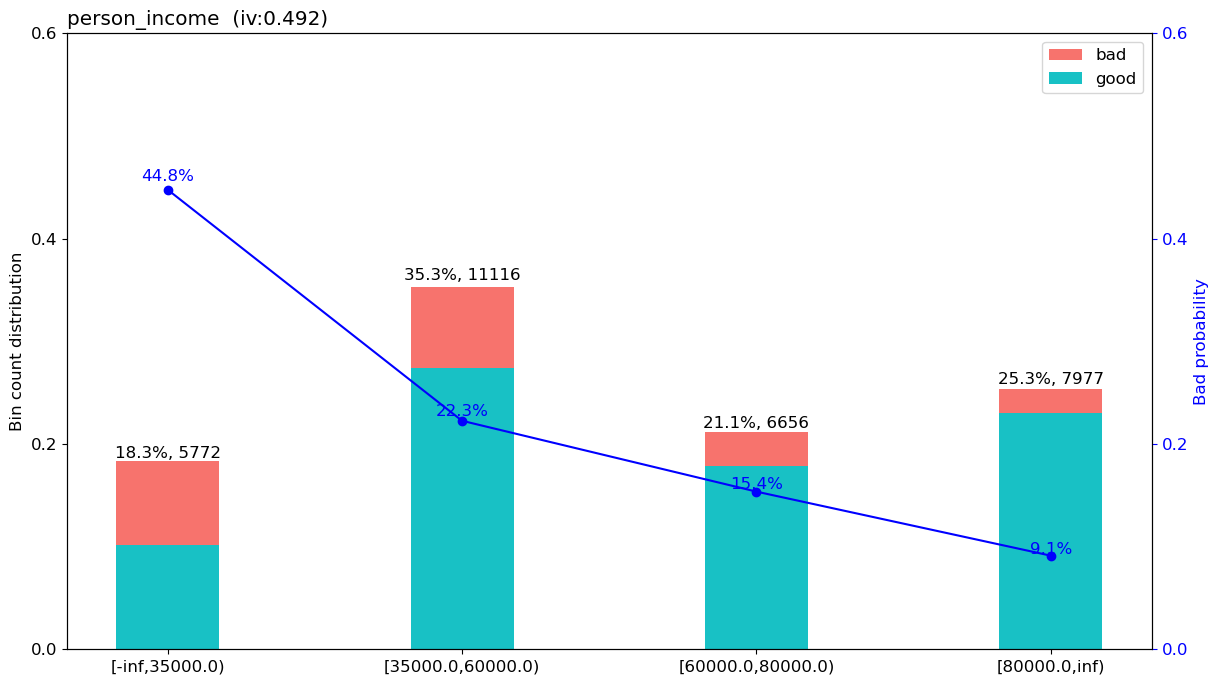

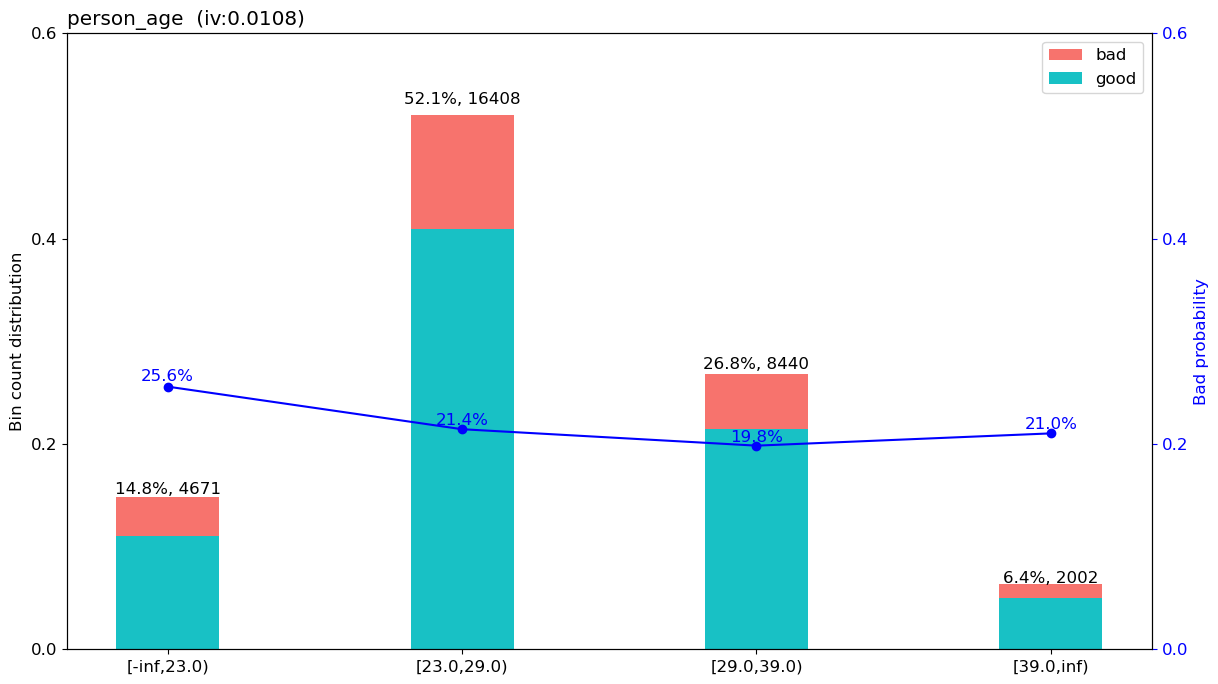

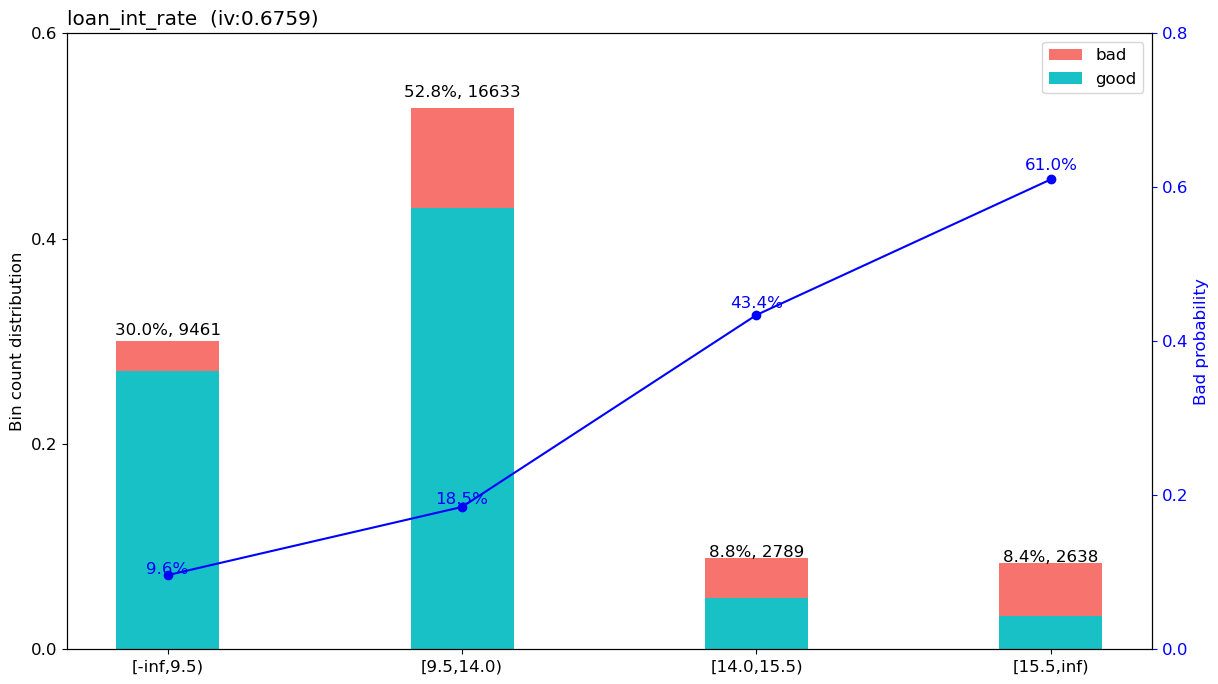

In [288]:
p1 = sc.woebin_plot(bins)


for key in p1.keys():
    fig = p1[key]  
    fig.set_size_inches(14, 8)  
    plt.close(fig)  
    display(fig)  


In [289]:
df_s = df_s.drop(columns=["person_age"])
bins.pop("person_age")  


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,person_age,"[-inf,23.0)",4671,0.148187,3476,1195,0.255834,0.221682,0.007738,0.010844,23.0,False
1,person_age,"[23.0,29.0)",16408,0.520542,12891,3517,0.214347,-0.009503,0.000047,0.010844,29.0,False
2,person_age,"[29.0,39.0)",8440,0.267758,6766,1674,0.198341,-0.107276,0.002987,0.010844,39.0,False
3,person_age,"[39.0,inf)",2002,0.063513,1581,421,0.210290,-0.033762,0.000072,0.010844,inf,False


In [290]:
df_woe = sc.woebin_ply(df_s, bins)


[INFO] converting into woe values ...


In [291]:
df_woe.head()


,loan_status,loan_percent_income_woe,loan_intent_woe,person_home_ownership_woe,cb_person_default_on_file_woe,loan_grade_woe,loan_amnt_woe,person_emp_length_woe,person_income_woe,loan_int_rate_woe
1,0,-0.696672,-0.375301,-1.306106,-0.218651,-0.371282,-0.171286,-0.120684,1.079363,-0.194253
2,1,2.168457,0.295158,-0.656667,-0.218651,-0.077151,-0.171286,0.301116,1.079363,-0.194253
3,1,2.168457,0.295158,0.494887,-0.218651,-0.077151,0.636423,-0.120684,-0.417640,1.024707
4,1,2.168457,0.295158,0.494887,0.783720,-0.077151,0.636423,-0.312451,0.038621,1.024707
5,1,-0.110576,-0.375301,-1.306106,-0.218651,-0.957321,-0.171286,0.301116,1.079363,-0.949725


In [292]:
sc.vif(df_woe, y = 'loan_status',merge_coef=True)

,variables,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],vif
0,cb_person_default_on_file_woe,-0.015244,0.045969,-0.331615,7.401797e-01,-0.105343,0.074854,1.295994
1,const,-1.376681,0.019060,-72.229556,0.000000e+00,-1.414038,-1.339324,1.113895
2,loan_amnt_woe,0.142924,0.085264,1.676264,9.368641e-02,-0.024189,0.310038,1.677096
3,loan_grade_woe,1.131609,0.035491,31.884686,4.353525e-223,1.062049,1.201170,4.144584
4,loan_int_rate_woe,0.138106,0.039558,3.491266,4.807377e-04,0.060575,0.215637,3.917945
5,loan_intent_woe,1.464647,0.060763,24.104198,2.258762e-128,1.345554,1.583741,1.003669
6,loan_percent_income_woe,1.065101,0.023174,45.960369,0.000000e+00,1.019681,1.110522,1.606460
7,person_emp_length_woe,0.449838,0.076597,5.872773,4.285652e-09,0.299710,0.599965,1.068540
8,person_home_ownership_woe,0.943213,0.031088,30.340017,3.402539e-202,0.882281,1.004144,1.095658
9,person_income_woe,0.744551,0.032557,22.869363,9.379192e-116,0.680741,0.808361,1.576409


In [293]:
corr_matrix = df_woe.corr()
corr_matrix



,loan_status,loan_percent_income_woe,loan_intent_woe,person_home_ownership_woe,cb_person_default_on_file_woe,loan_grade_woe,loan_amnt_woe,person_emp_length_woe,person_income_woe,loan_int_rate_woe
loan_status,1.000000,0.437552,0.124262,0.237609,0.181292,0.411469,0.125314,0.100488,0.288800,0.355120
loan_percent_income_woe,0.437552,1.000000,0.001515,0.075355,0.025924,0.100846,0.408508,0.034753,0.300265,0.086331
loan_intent_woe,0.124262,0.001515,1.000000,0.048691,0.009411,0.021384,0.013489,-0.014011,0.007009,0.016546
person_home_ownership_woe,0.237609,0.075355,0.048691,1.000000,0.053425,0.095574,-0.087443,0.200715,0.226855,0.091335
cb_person_default_on_file_woe,0.181292,0.025924,0.009411,0.053425,1.000000,0.475048,0.053787,0.025882,0.034792,0.431554
loan_grade_woe,0.411469,0.100846,0.021384,0.095574,0.475048,1.000000,0.153973,0.041380,0.050921,0.862477
loan_amnt_woe,0.125314,0.408508,0.013489,-0.087443,0.053787,0.153973,1.000000,-0.084049,-0.324733,0.143318
person_emp_length_woe,0.100488,0.034753,-0.014011,0.200715,0.025882,0.041380,-0.084049,1.000000,0.190427,0.038268
person_income_woe,0.288800,0.300265,0.007009,0.226855,0.034792,0.050921,-0.324733,0.190427,1.000000,0.042361
loan_int_rate_woe,0.355120,0.086331,0.016546,0.091335,0.431554,0.862477,0.143318,0.038268,0.042361,1.000000


## Data Division and Model Building

In [294]:
dt_list = sc.split_df(df_woe, y="loan_status", ratio=0.8, seed=42)
train = dt_list["train"]
test = dt_list["test"]


In [295]:
dt_list1 = sc.split_df(df_s, y="loan_status", ratio=0.8, seed=42)
train1 = dt_list1["train"]
test1 = dt_list1["test"]

In [297]:
test

,loan_status,loan_percent_income_woe,loan_intent_woe,person_home_ownership_woe,cb_person_default_on_file_woe,loan_grade_woe,loan_amnt_woe,person_emp_length_woe,person_income_woe,loan_int_rate_woe
5,1,-0.110576,-0.375301,-1.306106,-0.218651,-0.957321,-0.171286,0.301116,1.079363,-0.949725
6,1,2.168457,-0.375301,0.494887,-0.218651,-0.371282,0.636423,-0.312451,-0.417640,-0.194253
7,1,2.168457,0.295158,0.494887,-0.218651,-0.371282,0.636423,-0.120684,-0.417640,-0.194253
11,1,2.168457,0.295158,-1.306106,-0.218651,-0.957321,-0.171286,0.301116,1.079363,-0.949725
24,1,2.168457,-0.127793,0.494887,0.783720,1.734980,0.636423,-0.120684,-1.010412,1.024707
...,...,...,...,...,...,...,...,...,...,...
32553,0,-0.110576,0.295158,0.494887,-0.218651,-0.077151,-0.171286,0.301116,1.079363,-0.194253
32555,0,-0.110576,0.295158,0.494887,0.783720,1.734980,0.302966,-0.120684,-1.010412,1.738037
32567,0,-0.696672,-0.127793,0.494887,-0.218651,-0.957321,-0.171286,0.301116,-1.010412,-0.949725
32576,0,-0.696672,-0.127793,-0.656667,-0.218651,-0.077151,-0.171286,0.301116,0.038621,-0.194253


In [298]:
test1

,loan_percent_income,person_income,loan_intent,loan_int_rate,cb_person_default_on_file,loan_grade,loan_amnt,person_emp_length,person_home_ownership,loan_status
5,0.25,9900,VENTURE,7.14,N,A,2500,2.0,OWN,1
6,0.45,77100,EDUCATION,12.42,N,B,35000,8.0,RENT,1
7,0.44,78956,MEDICAL,11.11,N,B,35000,5.0,RENT,1
11,0.45,10000,HOMEIMPROVEMENT,8.63,N,A,4500,2.0,OWN,1
24,0.42,80000,PERSONAL,14.54,Y,D,33950,3.0,RENT,1
...,...,...,...,...,...,...,...,...,...,...
32553,0.25,20000,MEDICAL,10.99,N,C,5000,2.0,RENT,0
32555,0.23,80000,HOMEIMPROVEMENT,18.78,Y,F,18000,3.0,RENT,0
32567,0.09,85000,PERSONAL,7.74,N,A,8000,2.0,RENT,0
32576,0.11,53000,PERSONAL,13.16,N,C,5800,1.0,MORTGAGE,0


In [299]:
train

,loan_status,loan_percent_income_woe,loan_intent_woe,person_home_ownership_woe,cb_person_default_on_file_woe,loan_grade_woe,loan_amnt_woe,person_emp_length_woe,person_income_woe,loan_int_rate_woe
1,0,-0.696672,-0.375301,-1.306106,-0.218651,-0.371282,-0.171286,-0.120684,1.079363,-0.194253
2,1,2.168457,0.295158,-0.656667,-0.218651,-0.077151,-0.171286,0.301116,1.079363,-0.194253
3,1,2.168457,0.295158,0.494887,-0.218651,-0.077151,0.636423,-0.120684,-0.417640,1.024707
4,1,2.168457,0.295158,0.494887,0.783720,-0.077151,0.636423,-0.312451,0.038621,1.024707
8,1,2.168457,-0.127793,0.494887,-0.218651,-0.957321,0.636423,-0.312451,-1.010412,-0.949725
...,...,...,...,...,...,...,...,...,...,...
32574,1,2.168457,-0.127793,0.494887,0.783720,1.734980,0.636423,-0.120684,-0.417640,1.738037
32575,0,-0.696672,-0.375301,0.494887,-0.218651,-0.371282,-0.171286,0.301116,-0.417640,-0.194253
32577,0,-0.696672,-0.127793,-0.656667,-0.218651,-0.957321,0.302966,-0.120684,-1.010412,-0.949725
32578,1,2.168457,0.295158,0.494887,-0.218651,-0.371282,0.636423,-0.120684,-0.417640,-0.194253


In [300]:
train1

,loan_percent_income,person_income,loan_intent,loan_int_rate,cb_person_default_on_file,loan_grade,loan_amnt,person_emp_length,person_home_ownership,loan_status
1,0.10,9600,EDUCATION,11.14,N,B,1000,5.0,OWN,0
2,0.57,9600,MEDICAL,12.87,N,C,5500,1.0,MORTGAGE,1
3,0.53,65500,MEDICAL,15.23,N,C,35000,4.0,RENT,1
4,0.55,54400,MEDICAL,14.27,Y,C,35000,8.0,RENT,1
8,0.42,83000,PERSONAL,8.90,N,A,35000,8.0,RENT,1
...,...,...,...,...,...,...,...,...,...,...
32574,0.31,65004,PERSONAL,15.58,Y,D,20000,4.0,RENT,1
32575,0.08,64500,EDUCATION,11.26,N,B,5000,0.0,RENT,0
32577,0.15,120000,PERSONAL,7.49,N,A,17625,4.0,MORTGAGE,0
32578,0.46,76000,HOMEIMPROVEMENT,10.99,N,B,35000,3.0,RENT,1


In [301]:
train.shape

(25217, 10)

In [302]:
test.shape

(6304, 10)

In [303]:
model = LogisticRegression(max_iter=1000)

X_train = train.drop(columns=["loan_status"])
y_train = train["loan_status"]
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [304]:
test["pred_prob"] = model.predict_proba(test.drop(columns=["loan_status"]))[:, 1]


In [305]:
test

,loan_status,loan_percent_income_woe,loan_intent_woe,person_home_ownership_woe,cb_person_default_on_file_woe,loan_grade_woe,loan_amnt_woe,person_emp_length_woe,person_income_woe,loan_int_rate_woe,pred_prob
5,1,-0.110576,-0.375301,-1.306106,-0.218651,-0.957321,-0.171286,0.301116,1.079363,-0.949725,0.026524
6,1,2.168457,-0.375301,0.494887,-0.218651,-0.371282,0.636423,-0.312451,-0.417640,-0.194253,0.511182
7,1,2.168457,0.295158,0.494887,-0.218651,-0.371282,0.636423,-0.120684,-0.417640,-0.194253,0.754634
11,1,2.168457,0.295158,-1.306106,-0.218651,-0.957321,-0.171286,0.301116,1.079363,-0.949725,0.447089
24,1,2.168457,-0.127793,0.494887,0.783720,1.734980,0.636423,-0.120684,-1.010412,1.024707,0.928460
...,...,...,...,...,...,...,...,...,...,...,...
32553,0,-0.110576,0.295158,0.494887,-0.218651,-0.077151,-0.171286,0.301116,1.079363,-0.194253,0.550267
32555,0,-0.110576,0.295158,0.494887,0.783720,1.734980,0.302966,-0.120684,-1.010412,1.738037,0.697671
32567,0,-0.696672,-0.127793,0.494887,-0.218651,-0.957321,-0.171286,0.301116,-1.010412,-0.949725,0.024535
32576,0,-0.696672,-0.127793,-0.656667,-0.218651,-0.077151,-0.171286,0.301116,0.038621,-0.194253,0.051182


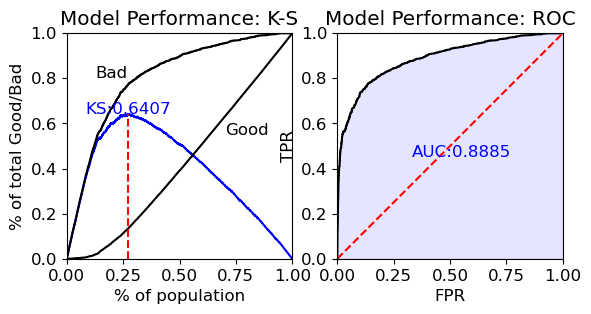

{'KS': 0.6407,
 'AUC': 0.8885,
 'Gini': 0.7771,
 'pic': <Figure size 640x480 with 2 Axes>}

In [306]:
sc.perf_eva(test["loan_status"], test["pred_prob"], title="Model Performance")


## Creating scorecard

In [307]:
card = sc.scorecard(bins, model, X_train.columns, points0=600, odds0=1/19, pdo=50)



In [308]:
card


{'basepoints':      variable  bin  points
 0  basepoints  NaN   487.0,
 'loan_percent_income':               variable          bin  points
 0  loan_percent_income  [-inf,0.16)    53.0
 1  loan_percent_income  [0.16,0.31)     8.0
 2  loan_percent_income   [0.31,inf)  -164.0,
 'loan_intent':       variable                                            bin  points
 3  loan_intent                            VENTURE%,%EDUCATION    41.0
 4  loan_intent                                       PERSONAL    14.0
 5  loan_intent  HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION   -32.0,
 'person_home_ownership':                 variable           bin  points
 6  person_home_ownership           OWN    90.0
 7  person_home_ownership      MORTGAGE    45.0
 8  person_home_ownership  RENT%,%OTHER   -34.0,
 'cb_person_default_on_file':                      variable bin  points
 9   cb_person_default_on_file   N    -0.0
 10  cb_person_default_on_file   Y     0.0,
 'loan_grade':       variable            bin  po

In [309]:
card_df = pd.concat(card.values(), ignore_index=True)
print(card_df.head(10))  


                variable                                            bin  \
0             basepoints                                            NaN   
1    loan_percent_income                                    [-inf,0.16)   
2    loan_percent_income                                    [0.16,0.31)   
3    loan_percent_income                                     [0.31,inf)   
4            loan_intent                            VENTURE%,%EDUCATION   
5            loan_intent                                       PERSONAL   
6            loan_intent  HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION   
7  person_home_ownership                                            OWN   
8  person_home_ownership                                       MORTGAGE   
9  person_home_ownership                                   RENT%,%OTHER   

   points  
0   487.0  
1    53.0  
2     8.0  
3  -164.0  
4    41.0  
5    14.0  
6   -32.0  
7    90.0  
8    45.0  
9   -34.0  


In [311]:
table = PrettyTable()
table.field_names = ["Variable", "Bin", "Points"]

for _, row in card_df.iterrows():
    table.add_row([row["variable"], row["bin"], row["points"]])

print(table)


+---------------------------+-----------------------------------------------+--------+
|          Variable         |                      Bin                      | Points |
+---------------------------+-----------------------------------------------+--------+
|         basepoints        |                      nan                      | 487.0  |
|    loan_percent_income    |                  [-inf,0.16)                  |  53.0  |
|    loan_percent_income    |                  [0.16,0.31)                  |  8.0   |
|    loan_percent_income    |                   [0.31,inf)                  | -164.0 |
|        loan_intent        |              VENTURE%,%EDUCATION              |  41.0  |
|        loan_intent        |                    PERSONAL                   |  14.0  |
|        loan_intent        | HOMEIMPROVEMENT%,%MEDICAL%,%DEBTCONSOLIDATION | -32.0  |
|   person_home_ownership   |                      OWN                      |  90.0  |
|   person_home_ownership   |              

In [312]:
with open("scorecard.txt", "w") as f:
    f.write(table.get_string()) 


In [313]:
df_score = sc.scorecard_ply(test1, card)


In [314]:
df_score

,score
5,648.0
6,385.0
7,306.0
11,403.0
24,202.0
...,...
32553,373.0
32555,326.0
32567,654.0
32576,599.0
